# **Unicorn Company Exploratory Data Analysis**

### A unicorn company/startup is a private company with a valuation over  \\$1 billion. The following Kaggle dataset contains a list of such unicorns along with data about each. We will be exploring and analyzing this data.

In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [276]:
df = pd.read_csv('Unicorn_Companies.csv')

In [277]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


# Data Cleaning

In [278]:
# Fix simple spelling error
df = df.rename(columns={'Select Inverstors': 'Select Investors'})

In [279]:
# Replace other spelling/input errors
df.replace({
    'Artificial intelligence': 'Artificial Intelligence',
    'Finttech': 'Fintech',
    'United States,': 'United States',
    'Indonesia,': 'Indonesia',
}, inplace=True)

In [280]:
# Get rid of $ symbol and convert string column to float
df['Valuation ($B)'] = df['Valuation ($B)'].replace({'\$': ''}, regex=True)
df['Valuation ($B)'] = df['Valuation ($B)'].astype(float)

In [281]:
# Also converting Investor Count will be helpful later
# First, replace None values with 0
df['Investors Count'] = df['Investors Count'].replace({'None': '0'}, regex=True)
df['Investors Count'] = df['Investors Count'].astype(float)

In [282]:
df['Deal Terms'] = df['Deal Terms'].replace({'None': '0'}, regex=True)
df['Deal Terms'] = df['Deal Terms'].astype(float)

In [283]:
# Many characters need replaced in this column
df['Total Raised'] = df['Total Raised'].replace({'\$': ''}, regex=True)
df['Total Raised'] = df['Total Raised'].replace({'M': ''}, regex=True)
df['Total Raised'] = df['Total Raised'].replace({'B': ''}, regex=True)
df['Total Raised'] = df['Total Raised'].replace({'K': ''}, regex=True)
df['Total Raised'] = df['Total Raised'].replace({'None': 0}, regex=True)
df['Total Raised'] = df['Total Raised'].astype(float)

In [284]:
# Many Cities and Industries are mistakenly swapped
df['Industry'].unique()

array(['Artificial Intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank',
       'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures',
       'Mundi Ventures, Doqling Capital Partners, Activant Capital',
       'Vertex Ventures SE Asia, Global Founders Capita

In [285]:
df['Industry'].value_counts()

Fintech                                                               206
Internet software & services                                          192
E-commerce & direct-to-consumer                                       107
Artificial Intelligence                                                80
Health                                                                 69
Supply chain, logistics, & delivery                                    57
Other                                                                  56
Cybersecurity                                                          49
Data management & analytics                                            41
Mobile & telecommunications                                            37
Hardware                                                               33
Auto & transportation                                                  29
Edtech                                                                 28
Consumer & retail                     

In [286]:
# Swap columns with invalid input
industries = ['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel']

df['Industry'], df['City'] = np.where(~df['Industry'].isin(industries), (df['City'],df['Industry']), (df['Industry'],df['City']))
df['Industry'], df['City'] = np.where(~df['Industry'].isin(industries), (df['City'],df['Industry']), (df['Industry'],df['City']))

In [287]:
df['Industry'].value_counts()

Fintech                                212
Internet software & services           194
E-commerce & direct-to-consumer        111
Artificial Intelligence                 80
Health                                  69
Supply chain, logistics, & delivery     58
Other                                   56
Cybersecurity                           49
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                33
Auto & transportation                   29
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Industry, dtype: int64

# Univariate Analysis

## To which industry do most unicorns belong?

In [288]:
bar_df = df['Industry'].value_counts()
bar_df.head()

Fintech                            212
Internet software & services       194
E-commerce & direct-to-consumer    111
Artificial Intelligence             80
Health                              69
Name: Industry, dtype: int64

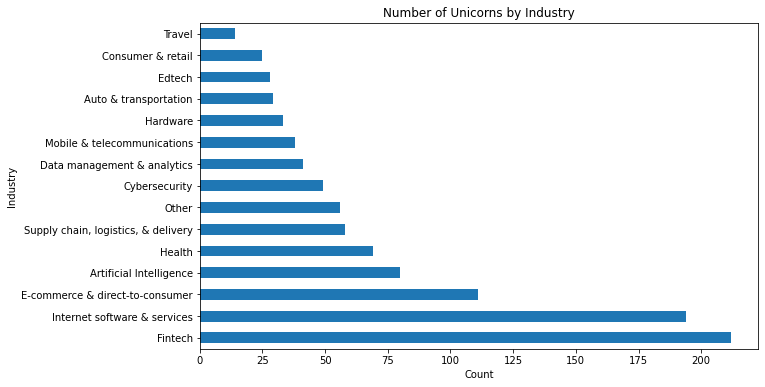

In [289]:
fig, ax = plt.subplots(figsize=(10,6))
ax = df['Industry'].value_counts().plot(kind='barh')
ax.set(xlabel='Count', ylabel='Industry', title='Number of Unicorns by Industry')
plt.show()

## From which country do most unicorns originate?

In [290]:
# Top 5 countries
sizes = df['Country'].value_counts()[:5]
sizes

United States     536
China             168
India              63
United Kingdom     42
France             24
Name: Country, dtype: int64

In [291]:
# Other unicorns not originating from the top 5 countries
sumOther = df['Country'].value_counts()[5:].sum()
sumOther

204

In [292]:
sizes2 = pd.Series(np.concatenate((sizes.values, [sumOther])))

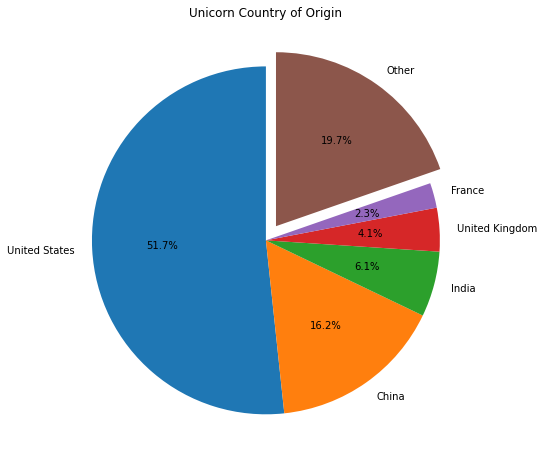

In [293]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes2, explode=(0,0,0,0,0,0.1), labels=['United States', 'China', 'India', 'United Kingdom', 'France', 'Other'], 
        autopct='%1.1f%%', startangle=90)
ax1.set(title='Unicorn Country of Origin')
plt.show()

### Which country's unicorns have produced the most value?

In [294]:
country_df = df.groupby('Country')

In [295]:
ax2 = country_df['Valuation ($B)'].sum().sort_values(ascending=False)[:5]
ax2

Country
United States     1829.74
China              572.69
India              187.05
United Kingdom     177.68
Germany             66.70
Name: Valuation ($B), dtype: float64

<AxesSubplot:title={'center':'Top five Countries'}, xlabel='Country', ylabel='Valuation ($B)'>

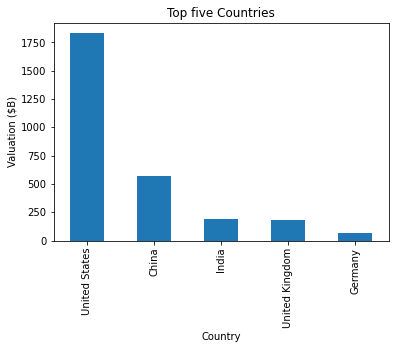

In [296]:
ax2.plot(kind='bar', title='Top five Countries', ylabel='Valuation ($B)')

# Bivariate Analysis

## What relationships can be found between nominal variables?

In [297]:
# Create dataframe with relevant variables
matrix_df = df[['Valuation ($B)', 'Total Raised', 'Investors Count', 'Deal Terms']]
matrix_df.head()

,Valuation ($B),Total Raised,Investors Count,Deal Terms
0,140.0,7.440,28.0,8.0
1,100.3,6.874,29.0,12.0
2,95.0,2.901,39.0,12.0
3,45.6,3.472,56.0,13.0
4,42.0,4.377,25.0,5.0


In [298]:
corr = matrix_df.corr()

[Text(0.5, 0, 'Valuation ($B)'),
 Text(1.5, 0, 'Total Raised'),
 Text(2.5, 0, 'Investors Count'),
 Text(3.5, 0, 'Deal Terms')]

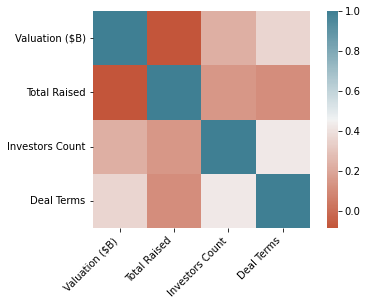

In [299]:
ax = sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=45, 
                   horizontalalignment='right')

### As the heatmap shows, no obvious relationship can be found between the nominal variables included in this dataset.